**Name: Afrin Qureshi**

**Rollno:L026**

**Subject: Big Data Analysis**



# **Practical 01 : Practical on SparkSQL**

In [4]:
!pip install pyspark

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
import pandas as pd

In [5]:
data = [("James","Smith","USA","CA"),("Michael","Rose","USA","NY"),
    ("Robert","Williams","USA","CA"),("Maria","Jones","USA","FL")
  ]
columns=["firstname","lastname","country","state"]
df=spark.createDataFrame(data=data,schema=columns)
#df.printSchema()
df.show()
#print(df.collect())

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+



In [6]:
from pyspark.sql.functions import col,expr
data=[("2019-01-23",1),("2019-06-24",2),("2019-09-20",5)]
spark.createDataFrame(data).toDF("date","increment") \
    .select(col("date"),col("increment"), \
      expr("add_months(to_date(date,'yyyy-MM-dd'),cast(increment as int))").alias("inc_date")) \
    .show()

+----------+---------+----------+
|      date|increment|  inc_date|
+----------+---------+----------+
|2019-01-23|        1|2019-02-23|
|2019-06-24|        2|2019-08-24|
|2019-09-20|        5|2020-02-20|
+----------+---------+----------+



In [8]:
from pyspark.sql.functions import col
from pyspark.sql.functions import to_timestamp, current_timestamp
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, LongType
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

schema = StructType([
            StructField("seq", StringType(), True)])

# Modify the data to be a list of strings
dates = [['1']]  # Now a list containing a single-element list

df = spark.createDataFrame(dates, schema=schema)

df.show()

+---+
|seq|
+---+
|  1|
+---+












# **Practical 02 : PySpark with pipline**

In [9]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.getOrCreate()
import pandas as pd
import pyspark.sql.types as tp
from pyspark.ml.feature import Imputer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

In [10]:
#read csv file
my_data=spark.read.csv('/content/drive/MyDrive/diabetes.csv',header=True)

In [11]:
my_data.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|  31|                   0.248| 26|      1|


In [12]:
#see the schema
my_data.printSchema()

root
 |-- Pregnancies: string (nullable = true)
 |-- Glucose: string (nullable = true)
 |-- BloodPressure: string (nullable = true)
 |-- SkinThickness: string (nullable = true)
 |-- Insulin: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- DiabetesPedigreeFunction: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Outcome: string (nullable = true)



In [15]:
#define schema
my_schema=tp.StructType(
    [
        tp.StructField('Pregnancies',tp.IntegerType(),True),
        tp.StructField('Glucose',tp.IntegerType(),True),
        tp.StructField('BloodPressure',tp.IntegerType(),True),
        tp.StructField('SkinThickness',tp.IntegerType(),True),
        tp.StructField('Insulin',tp.IntegerType(),True),
        tp.StructField('BMI',tp.FloatType(),True),
        tp.StructField('DiabetesPedigreeFunction',tp.FloatType(),True),
        tp.StructField('Age',tp.IntegerType(),True),
        tp.StructField('Outcome',tp.IntegerType(),True)
    ]
)

In [17]:
my_data=spark.read.csv('/content/drive/MyDrive/diabetes.csv',header=True,schema=my_schema)
my_data.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: float (nullable = true)
 |-- DiabetesPedigreeFunction: float (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [18]:
#get dimension of data
(my_data.count(),len(my_data.columns))

(768, 9)

In [19]:
my_data.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.599998474121094, DiabetesPedigreeFunction=0.6269999742507935, Age=50, Outcome=1)

In [20]:
#Replace zero with null for filling missing values
from pyspark.sql.functions import when, col

def replace_zero_with_null(df):
    for i, column_name in enumerate(df.columns):
        # Skip first and last column
        if i == 0 or i == len(df.columns) - 1:
            continue
        df = df.withColumn(column_name, when(col(column_name) == 0, None).otherwise(col(column_name)))
    return df

my_data = replace_zero_with_null(my_data)
my_data.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|   NULL|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|   NULL|26.6|                   0.351| 31|      0|
|          8|    183|           64|         NULL|   NULL|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|         NULL|   NULL|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [21]:
#impute values in null place in
imputer = Imputer(
    inputCols=my_data.columns,
    outputCols=my_data.columns
    ).setStrategy("median")


my_data1 = imputer.fit(my_data).transform(my_data)

In [22]:
my_data1.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|    125|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|    125|26.6|                   0.351| 31|      0|
|          8|    183|           64|           29|    125|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|           29|    125|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [23]:
# specify the input and output columns of the vector assembler
assembler = VectorAssembler(inputCols=['Pregnancies',
                                       'Glucose',
                                       'BloodPressure',
                                       'SkinThickness',
                                       'Insulin', 'BMI',
                                       'DiabetesPedigreeFunction',
                                       'Age'],
                             outputCol='features')

final_data = assembler.transform(my_data1)
final_data.select('features', 'Outcome').show()

+--------------------+-------+
|            features|Outcome|
+--------------------+-------+
|[6.0,148.0,72.0,3...|      1|
|[1.0,85.0,66.0,29...|      0|
|[8.0,183.0,64.0,2...|      1|
|[1.0,89.0,66.0,23...|      0|
|[0.0,137.0,40.0,3...|      1|
|[5.0,116.0,74.0,2...|      0|
|[3.0,78.0,50.0,32...|      1|
|[10.0,115.0,72.0,...|      0|
|[2.0,197.0,70.0,4...|      1|
|[8.0,125.0,96.0,2...|      1|
|[4.0,110.0,92.0,2...|      0|
|[10.0,168.0,74.0,...|      1|
|[10.0,139.0,80.0,...|      0|
|[1.0,189.0,60.0,2...|      1|
|[5.0,166.0,72.0,1...|      1|
|[7.0,100.0,72.0,2...|      1|
|[0.0,118.0,84.0,4...|      1|
|[7.0,107.0,74.0,2...|      1|
|[1.0,103.0,30.0,3...|      0|
|[1.0,115.0,70.0,3...|      1|
+--------------------+-------+
only showing top 20 rows



In [24]:
#split data for test and train
train_data,test_data=final_data.randomSplit([0.8,0.2])

In [25]:
#train the model
lr=LogisticRegression(featuresCol='features',labelCol='Outcome', maxIter=10)
model=lr.fit(train_data)

In [26]:
#test model
prediction=model.transform(test_data)
prediction.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+--------------------+--------------------+----------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|            features|       rawPrediction|         probability|prediction|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+--------------------+--------------------+----------+
|          0|     74|           52|           10|     36|27.8|                   0.269| 22|      0|[0.0,74.0,52.0,10...|[3.71020642670902...|[0.97611212436466...|       0.0|
|          0|     94|           72|           29|    125|32.3|                   0.256| 25|      0|[0.0,94.0,72.0,29...|[2.71351187598598...|[0.93781925636153...|       0.0|
|          0|     99|           72|           29|    125|25.0|                   0.253| 22|      0|[0.0,99.0,72.0,29...|[3.2201151

In [ ]:
#create a pipeline
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[replace_zero_with_null,imputer, assembler, lr])
pipeline_model = pipeline.fit(my_data1)
pred = pipeline_model.transform(my_data1)
pred.show(5)

In [28]:
#create new data for prediction with outcome column
Pregnancies=1
Glucose=166
BloodPressure=72
SkinThickness=15
Insulin=17
BMI=33.6
DiabetesPedigreeFunction=0.627
Age=50
# Add a placeholder value for 'Outcome' (you'll need to determine the appropriate value based on your problem)
Outcome = 0
new_data=spark.createDataFrame([(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age, Outcome)],
                               ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age', 'Outcome'])
new_data.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          1|    166|           72|           15|     17|33.6|                   0.627| 50|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+



In [ ]:
#predicte new data through pipline
pipeline_model.transform(new_data).show()

# **Practical 03 : Construct K-shingles**

In [35]:
import re
from collections import defaultdict
import numpy as np

def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().lower() # Read text and convert to lowercase
        text = re.sub(r'\s+', ' ', text) # Replace multiple spaces with single space
        text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
        return text

def generate_4_shingles(text):
    words = text.split() # Split text into words
    shingles = []
    seen_shingles = set() # To track seen shingles and maintain order

    for i in range(len(words) - 3):
        shingle = ' '.join(words[i:i+4]) # Create 4-shingle
        if shingle not in seen_shingles:
            shingles.append(shingle)
            seen_shingles.add(shingle)

    return shingles

def create_incidence_matrix(file_paths):
    shingle_counts = defaultdict(int) # Dictionary to store shingle counts
    all_shingles = [] # List to store all shingles in order of appearance

    # Step 1: Count shingles and collect all unique shingles in order
    for file_path in file_paths:
        text = read_text_file(file_path)
        shingles = generate_4_shingles(text)

        for shingle in shingles:
            shingle_counts[shingle] += 1
            if shingle not in all_shingles:
                all_shingles.append(shingle)

    num_files = len(file_paths)
    num_shingles = len(all_shingles)

    # Step 2: Create incidence matrix
    incidence_matrix = np.zeros((num_shingles, num_files), dtype=int)

    for j, file_path in enumerate(file_paths):
        text = read_text_file(file_path)
        shingles = generate_4_shingles(text)

        for i, shingle in enumerate(all_shingles):
            if shingle in shingles:
                incidence_matrix[i, j] = 1

    return all_shingles, incidence_matrix

def print_incidence_matrix(file_paths):
    shingles, incidence_matrix = create_incidence_matrix(file_paths)

    # Print header
    print("{:<40} {:<10} {:<10} {:<10}".format("Shingles", "txt1", "txt2", "txt3"))
    print("-" * 70)

    # Print matrix
    for idx, shingle in enumerate(shingles):
        print("{:<40} {:<10} {:<10} {:<10}".format(shingle, incidence_matrix[idx, 0], incidence_matrix[idx, 1], incidence_matrix[idx, 2]))

# Example usage:
file_paths = ["/content/drive/MyDrive/1.txt", "/content/drive/MyDrive/2.txt", "/content/drive/MyDrive/3.txt"] # Replace with your file paths

print_incidence_matrix(file_paths)

Shingles                                 txt1       txt2       txt3      
----------------------------------------------------------------------
what is machine learning                 1          0          0         
is machine learning its                  1          0          0         
machine learning its a                   1          0          0         
learning its a question                  1          0          0         
its a question that                      1          0          0         
a question that opens                    1          0          0         
question that opens the                  1          0          0         
that opens the door                      1          0          0         
opens the door to                        1          0          0         
the door to a                            1          0          0         
door to a new                            1          0          0         
to a new era                             

# **Practical 04 : Min Hashing**

In [38]:
# text=input("Enter a string: ")
# kval =int(input("Enter k-value: "))
text="hello"
kval=2
def shinglewithsepr(text, kval):
  shingles = []
  tokens = text.split(" ")
  for i in range(0, len(tokens), kval):
      shingle = tokens[i:i + kval]
      shingles.append(shingle)
  #print("Shingles using separator: ", shingles)
  return shingles
def shinglewithoutsepr(text, kval):
  shingles = []
  for i in range(len(text)-kval+1):
      shingle = text[i:i + kval]
      shingles.append(shingle)
  #print("Shingles without using separator: ", shingles)
  return shingles
wordshingles = shinglewithsepr(text, kval)
charshingles = shinglewithoutsepr(text, kval)

In [39]:
import pandas as pd
import numpy as np
import random
# with open("1.txt", "r") as file:
#   doc1 = file.read()
# print(doc1)
# with open("2.txt", "r") as file:
#   doc2 = file.read()
# print(doc2)
doc1 = "Today is Monday."
doc2 = "Today is a good day."
doc3 = "Good day."
doc4 = "Tomorrow will be a good day."
kval =3
shingle1 = shinglewithoutsepr(doc1, kval)
shingle2 = shinglewithoutsepr(doc2, kval)
shingle3 = shinglewithoutsepr(doc3, kval)
shingle4 = shinglewithoutsepr(doc4, kval)
all_shingles = list(set(shingle1 + shingle2+shingle3+shingle4))
print("Shingle 1:", shingle1)
print("Shingle 2:", shingle2)
print("Shingle 3:", shingle3)
print("Shingle 4:", shingle4)
print("All shingles:", all_shingles)
df = pd.DataFrame(columns=["Shingle", "doc1", "doc2","doc3","doc4"])
df["Shingle"] = all_shingles
df.fillna(0, inplace=True)
for i in range(len(shingle1)):
    df.loc[df["Shingle"] == shingle1[i], "doc1"] = 1
for i in range(len(shingle2)):
    df.loc[df["Shingle"] == shingle2[i], "doc2"] = 1
for i in range(len(shingle3)):
    df.loc[df["Shingle"] == shingle3[i], "doc3"] = 1
for i in range(len(shingle4)):
    df.loc[df["Shingle"] == shingle4[i], "doc4"] = 1
df["Hash1"] = df.index.map(lambda x: (17 * int(x) + 11) % len(df))
df["Hash2"] = df.index.map(lambda x: (7 * int(x) + 11) % len(df))
print(len(df))
print(df)

Shingle 1: ['Tod', 'oda', 'day', 'ay ', 'y i', ' is', 'is ', 's M', ' Mo', 'Mon', 'ond', 'nda', 'day', 'ay.']
Shingle 2: ['Tod', 'oda', 'day', 'ay ', 'y i', ' is', 'is ', 's a', ' a ', 'a g', ' go', 'goo', 'ood', 'od ', 'd d', ' da', 'day', 'ay.']
Shingle 3: ['Goo', 'ood', 'od ', 'd d', ' da', 'day', 'ay.']
Shingle 4: ['Tom', 'omo', 'mor', 'orr', 'rro', 'row', 'ow ', 'w w', ' wi', 'wil', 'ill', 'll ', 'l b', ' be', 'be ', 'e a', ' a ', 'a g', ' go', 'goo', 'ood', 'od ', 'd d', ' da', 'day', 'ay.']
All shingles: ['goo', 'Tom', 'omo', ' go', 'll ', 'w w', ' Mo', ' a ', 'ow ', 'mor', 'y i', 'day', 's a', 'l b', 'd d', 'Tod', 'a g', 'ill', 'od ', 'rro', 'row', 'Mon', 'nda', 'Goo', 'oda', 'is ', 'ond', 'ay.', 'orr', ' da', 'be ', ' wi', 'ood', 'wil', 'e a', 's M', ' is', ' be', 'ay ']
39
   Shingle  doc1  doc2  doc3  doc4  Hash1  Hash2
0      goo     0     1     0     1     11     11
1      Tom     0     0     0     1     28     18
2      omo     0     0     0     1      6     25
3       go

# **Practical 05 : Bloom Filter**

In [31]:
def hash1(x):
    return (x + 1) % 17

def hash2(x):
    return (3 * x + 2) % 17

def compute_hashes(x, size):
    h1 = hash1(x)
    h2 = hash2(x)
    index1 = h1 % size
    index2 = h2 % size
    return h1, h2, index1, index2

# Initialize bit array with 0
size = 18
bit_array = [0] * size

# Elements to add
elements = [15, 10, 3]
print("Element | h1(x) | h2(x) | Bit Index 1 | Bit Index 2")
print("---------------------------------------------------")
for element in elements:
    h1, h2, index1, index2 = compute_hashes(element, size)
    bit_array[index1] = 1
    bit_array[index2] = 1
    print(f"{element:7} | {h1:5} | {h2:5} | {index1:11} | {index2:11}")

# Display the bit array
print("\nBit array after adding elements:")
print(bit_array)

# Check new element
new_element = 7
new_h1, new_h2, new_index1, new_index2 = compute_hashes(new_element, size)

print(f"\nNew Element: {new_element}")
print(f"Hash1: {new_h1}, Bit Index 1: {new_index1}")
print(f"Hash2: {new_h2}, Bit Index 2: {new_index2}")

# Check if the new element is likely present
is_present = bit_array[new_index1] and bit_array[new_index2]
print(f"Is the new element {new_element} in the Bloom filter? {'Yes' if is_present else 'No'}")

# Display the updated bit array
print("\nBit array after checking new element:")
print(bit_array)


Element | h1(x) | h2(x) | Bit Index 1 | Bit Index 2
---------------------------------------------------
     15 |    16 |    13 |          16 |          13
     10 |    11 |    15 |          11 |          15
      3 |     4 |    11 |           4 |          11

Bit array after adding elements:
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0]

New Element: 7
Hash1: 8, Bit Index 1: 8
Hash2: 6, Bit Index 2: 6
Is the new element 7 in the Bloom filter? No

Bit array after checking new element:
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0]


# **Practical 06 : Flajolet-Martin**

In [33]:
def hash_function1(x):
    return (3 * x + 7) % 32

def hash_function2(x):
    return (5 * x + 11) % 32

def to_binary_string(value, bit_length=5):
    return format(value, f'0{bit_length}b')

def count_trailing_zeros(binary_value):
    return len(binary_value) - len(binary_value.rstrip('0'))

# Elements to process
elements = [3, 1, 4, 3, 7, 8]

# Prepare table data
table_data = []
max_power_of_two1 = 0  # Initialize the maximum value of 2^r for hash function 1
max_power_of_two2 = 0  # Initialize the maximum value of 2^r for hash function 2

for element in elements:
    # Compute hash values for both functions
    hash_value1 = hash_function1(element)
    hash_value2 = hash_function2(element)

    # Convert hash values to binary
    binary_value1 = to_binary_string(hash_value1)
    binary_value2 = to_binary_string(hash_value2)

    # Count trailing zeros
    r1 = count_trailing_zeros(binary_value1)
    r2 = count_trailing_zeros(binary_value2)

    # Compute power of two
    power_of_two1 = 2 ** r1
    power_of_two2 = 2 ** r2

    # Update maximum power of two values
    max_power_of_two1 = max(max_power_of_two1, power_of_two1)
    max_power_of_two2 = max(max_power_of_two2, power_of_two2)

    # Append row data
    table_data.append((element, hash_value1, binary_value1, r1, power_of_two1,
                       hash_value2, binary_value2, r2, power_of_two2))

# Print table headers
print(f"{'Element':<8} | {'Hash 1 Value':<12} | {'Binary 1 Value':<14} | {'Trailing Zeros 1':<17} | {'2^r1':<6} | {'Hash 2 Value':<12} | {'Binary 2 Value':<14} | {'Trailing Zeros 2':<17} | {'2^r2':<6}")
print("-" * 90)

# Print table rows
for element, hash_value1, binary_value1, r1, power_of_two1, hash_value2, binary_value2, r2, power_of_two2 in table_data:
    print(f"{element:<8} | {hash_value1:<12} | {binary_value1:<14} | {r1:<17} | {power_of_two1:<6} | {hash_value2:<12} | {binary_value2:<14} | {r2:<17} | {power_of_two2:<6}")

# Compute and print the average of the maximum values of 2^r for both hash functions
average_max_power_of_two = (max_power_of_two1 + max_power_of_two2) / 2
print(f"\nMaximum value of 2^r for Hash Function 1: {max_power_of_two1}")
print(f"Maximum value of 2^r for Hash Function 2: {max_power_of_two2}")
print(f"Average of the maximum values of 2^r: {average_max_power_of_two}")


Element  | Hash 1 Value | Binary 1 Value | Trailing Zeros 1  | 2^r1   | Hash 2 Value | Binary 2 Value | Trailing Zeros 2  | 2^r2  
------------------------------------------------------------------------------------------
3        | 16           | 10000          | 4                 | 16     | 26           | 11010          | 1                 | 2     
1        | 10           | 01010          | 1                 | 2      | 16           | 10000          | 4                 | 16    
4        | 19           | 10011          | 0                 | 1      | 31           | 11111          | 0                 | 1     
3        | 16           | 10000          | 4                 | 16     | 26           | 11010          | 1                 | 2     
7        | 28           | 11100          | 2                 | 4      | 14           | 01110          | 1                 | 2     
8        | 31           | 11111          | 0                 | 1      | 19           | 10011          | 0                 |

# **Practical 07 : Compute n moments**

In [1]:
import numpy as np
import pandas as pd

# Function to create and update X columns
def create_x_columns(data_points, x_indices):
    # Create a DataFrame to store the data points
    df = pd.DataFrame({'datapoints': data_points})

    for i, xi in enumerate(x_indices):
        col_name = f'X{i+1}.el'
        df[col_name] = None  # Initialize column with None

        # Get the value at the starting index for the current X
        if xi - 1 < len(data_points):  # Ensure the index is within bounds
            start_value = data_points[xi - 1]

            # Update the X column
            for j in range(xi - 1, len(data_points)):
                if data_points[j] == start_value:
                    df.loc[j, col_name] = 1

    return df

# Function to calculate X values and second moment
def calculate_second_moment(df, x_indices):
    n = len(df)
    x_vals = []

    for i in range(len(x_indices)):
        col_name = f'X{i+1}.el'
        x_val = df[col_name].sum()
        x_vals.append(x_val)

    second_moments = [n * (2 * x_val - 1) for x_val in x_vals]
    surprise_number = np.mean(second_moments)

    return x_vals, surprise_number

# Function to calculate the surprise based on frequency squares
def calculate_frequency_surprise(data_points):
    # Calculate frequency of each data point
    freq = pd.Series(data_points).value_counts()

    # Square the frequencies and sum them up
    freq_squares_sum = np.sum(freq ** 2)

    return freq_squares_sum

# Main function to run the algorithm
def main():
    # Get user input for the number of elements and X indices
    num_elements = int(input("Enter the number of elements: "))
    num_x = int(input("Enter the number of X indices: "))

    x_indices = []
    for i in range(num_x):
        x_index = int(input(f"Enter the position for X{i+1}: "))
        x_indices.append(x_index)

    # Generate random data points
    data_points = np.random.randint(1, 5, num_elements).tolist()
    print("\nGenerated Data Points:", data_points)

    # Create X columns and update values
    df = create_x_columns(data_points, x_indices)

    # Clean up the DataFrame to remove columns that are entirely None
    df_clean = df.dropna(axis=1, how='all')

    # Remove rows with all None values in X columns
    df_clean = df_clean.dropna(axis=0, how='all')

    # Convert DataFrame to a format without None values
    df_clean = df_clean.fillna('').astype(str)

    # Print the cleaned DataFrame
    print("\nDataFrame with X columns:")
    print(df_clean.to_string(index=False))

    # Calculate X values and second moment
    x_vals, second_moment_surprise = calculate_second_moment(df, x_indices)

    # Calculate the frequency-based surprise value
    frequency_surprise = calculate_frequency_surprise(data_points)

    print("\nX values:", x_vals)
    print("Second moment surprise number:", second_moment_surprise)
    print("Frequency-based surprise number:", frequency_surprise)

if __name__ == "__main__":
    main()


C:\Users\Qureshi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Qureshi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


Enter the number of elements: 20
Enter the number of X indices: 3
Enter the position for X1: 4
Enter the position for X2: 6
Enter the position for X3: 5

Generated Data Points: [1, 2, 2, 3, 2, 3, 1, 1, 4, 4, 2, 3, 1, 4, 3, 1, 1, 2, 2, 1]

DataFrame with X columns:
datapoints X1.el X2.el X3.el
         1                  
         2                  
         2                  
         3     1            
         2                 1
         3     1     1      
         1                  
         1                  
         4                  
         4                  
         2                 1
         3     1     1      
         1                  
         4                  
         3     1     1      
         1                  
         1                  
         2                 1
         2                 1
         1                  

X values: [4, 3, 4]
Second moment surprise number: 126.66666666666667
Frequency-based surprise number: 110


# **Practical 08 : Greedy Algorithm for Maximum Matching**

Is the graph bipartite? True
Greedy Maximum Matching: {(2, 'b'), (1, 'a'), (3, 'c')}


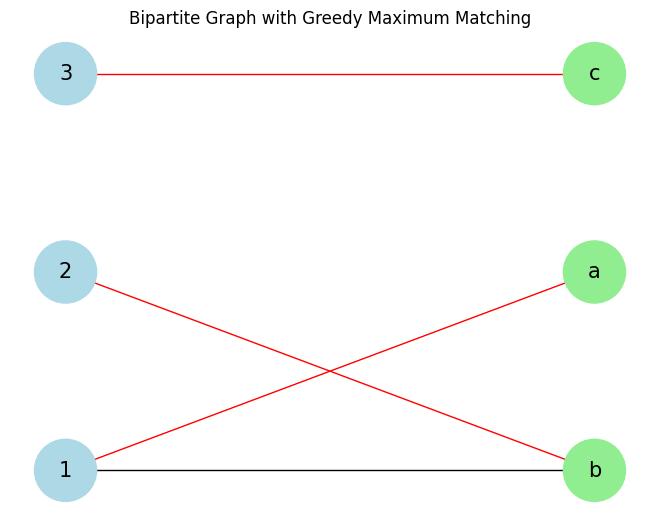

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

# Create a bipartite graph
def create_bipartite_graph():
    B = nx.Graph()
    # Add nodes with the attribute "bipartite"
    top_nodes = {1, 2, 3}
    bottom_nodes = {'a', 'b', 'c'}
    B.add_nodes_from(top_nodes, bipartite=0)
    B.add_nodes_from(bottom_nodes, bipartite=1)

    # Add edges between nodes in the two sets
    edges = [(1, 'a'), (1, 'b'), (2, 'b'), (3, 'c')]
    B.add_edges_from(edges)

    return B, top_nodes, bottom_nodes

# Greedy algorithm for maximum matching
def greedy_maximum_matching(B, top_nodes, bottom_nodes):
    matching = set()  # To store the matching pairs
    matched_nodes = set()  # To keep track of matched nodes

    # Iterate over edges greedily
    for u, v in B.edges():
        if u not in matched_nodes and v not in matched_nodes:
            matching.add((u, v))
            matched_nodes.add(u)
            matched_nodes.add(v)

    return matching

# Step 1: Create a bipartite graph
B, top_nodes, bottom_nodes = create_bipartite_graph()

# Step 2: Check if the graph is bipartite
is_bipartite = bipartite.is_bipartite(B)
print(f"Is the graph bipartite? {is_bipartite}")

# Step 3: Perform greedy maximum matching if bipartite
if is_bipartite:
    # Apply the greedy maximum matching algorithm
    matching = greedy_maximum_matching(B, top_nodes, bottom_nodes)
    print(f"Greedy Maximum Matching: {matching}")

    # Step 4: Plot the graph with matching edges highlighted
    pos = nx.bipartite_layout(B, top_nodes)

    # Highlight matching edges in red
    matching_edges = list(matching)
    edge_colors = ['red' if (u, v) in matching_edges or (v, u) in matching_edges else 'black' for u, v in B.edges()]

    # Draw the graph with the highlighted matching
    nx.draw(B, pos, with_labels=True, edge_color=edge_colors, node_color=['lightblue' if n in top_nodes else 'lightgreen' for n in B.nodes()], node_size=2000, font_size=15)
    plt.title("Bipartite Graph with Greedy Maximum Matching")
    plt.show()
else:
    print("The graph is not bipartite.")

In [40]:
sig = np.full((2,4), np.inf)
for index, row in df.iterrows():
   if row["doc1"] == 1:
       sig[0, 0] = min(sig[0, 0], row["Hash1"])
       sig[1, 0] = min(sig[1, 0], row["Hash2"])
   if row["doc2"] == 1:
       sig[0, 1] = min(sig[0, 1], row["Hash1"])
       sig[1, 1] = min(sig[1, 1], row["Hash2"])
   if row["doc3"] == 1:
       sig[0, 2] = min(sig[0, 2], row["Hash1"])
       sig[1, 2] = min(sig[1, 2], row["Hash2"])
   if row["doc4"] == 1:
       sig[0, 3] = min(sig[0, 3], row["Hash1"])
       sig[1, 3] = min(sig[1, 3], row["Hash2"])
print("Signature matrix =\n",sig)

Signature matrix =
 [[2. 2. 2. 0.]
 [2. 1. 1. 0.]]


# **PCY**

In [37]:
# Example list of transactions
transactions = [
    [1, 2, 3],
    [1, 3, 5],
    [3, 5, 6],
    [2, 3, 4],
    [2, 4, 6],
    [1, 2, 4],
    [3, 4, 5],
    [1, 3, 4],
    [2, 3, 5],
    [4, 5, 6],
    [2, 4, 5],
    [3, 4, 6]
]

# Step 1: Get unique items
unique = []
for transaction in transactions:
    for item in transaction:
        if item not in unique:
            unique.append(item)

print("Unique items:", unique)

# Step 2: Count occurrences of each unique item
count = []
for item in unique:
    item_count = sum(transaction.count(item) for transaction in transactions)
    count.append(item_count)

print("Counts of each unique item:", count)

# Step 3: Create pairs of each unique item
pairs = []
for i in range(len(unique)):
    for j in range(i + 1, len(unique)):
        pairs.append((unique[i], unique[j]))

print("Pairs of unique items:", pairs)

# Step 4: Check if pair is available in transaction and count its occurrences
pair_counts = {}
for pair in pairs:
    count = 0
    for transaction in transactions:
        if pair[0] in transaction and pair[1] in transaction:
            count += 1
    pair_counts[pair] = count

print("Counts of each pair in transactions:", pair_counts)



# Step 5: Apply threshold and hash function
threshold = 4
bucket_size = int(input("Enetr Bucket Size value: "))

# Hash function
def hash_function(i, j):
    return (i * j) % bucket_size

# Filter pairs based on threshold and calculate hash values using item values, not their indices
hash_table = []
for pair, count in pair_counts.items():
    if count >= threshold:
        # Corrected: Use the actual item values for hashing
        hash_value = hash_function(pair[0], pair[1])
        hash_table.append((pair, count, hash_value))

print("Filtered pairs, counts, and hash values:")
for entry in hash_table:
    print(f"Pair: {entry[0]}, Count: {entry[1]}, Hash Value: {entry[2]}")

# Step 6: Create a table of pairs, their counts, and their hash values
print("\nTable of pairs, counts, and hash values:")
print("Pair\t\tCount\tHash Value")
for entry in hash_table:
    print(f"{entry[0]}\t{entry[1]}\t{entry[2]}")

Unique items: [1, 2, 3, 5, 6, 4]
Counts of each unique item: [4, 6, 8, 6, 4, 8]
Pairs of unique items: [(1, 2), (1, 3), (1, 5), (1, 6), (1, 4), (2, 3), (2, 5), (2, 6), (2, 4), (3, 5), (3, 6), (3, 4), (5, 6), (5, 4), (6, 4)]
Counts of each pair in transactions: {(1, 2): 2, (1, 3): 3, (1, 5): 1, (1, 6): 0, (1, 4): 2, (2, 3): 3, (2, 5): 2, (2, 6): 1, (2, 4): 4, (3, 5): 4, (3, 6): 2, (3, 4): 4, (5, 6): 2, (5, 4): 3, (6, 4): 3}
Enetr Bucket Size value: 11
Filtered pairs, counts, and hash values:
Pair: (2, 4), Count: 4, Hash Value: 8
Pair: (3, 5), Count: 4, Hash Value: 4
Pair: (3, 4), Count: 4, Hash Value: 1

Table of pairs, counts, and hash values:
Pair		Count	Hash Value
(2, 4)	4	8
(3, 5)	4	4
(3, 4)	4	1
